In [42]:
import pandas as pd
import numpy as np
import math
import mpmath

In [77]:
#politicas fixas
rewards1 = pd.read_csv('/Users/dulpneto/workspace/OpenAI-GYM-CarRacing-DQN-Risk/r_bound_300/rewards_2.csv')

#politica encontrada
rewards2 = pd.read_csv('/Users/dulpneto/workspace/OpenAI-GYM-CarRacing-DQN-Risk/rewards_fixed_policy_20230522_v2.csv')
#rewards = pd.read_csv('/Users/dulpneto/workspace/OpenAI-GYM-CarRacing-DQN-Risk/rewards_tiles.csv')

#rewards = pd.concat([rewards2], axis=0, ignore_index=True)
rewards = pd.concat([rewards1,rewards2], axis=0, ignore_index=True)


lambs = []
for i in range(-2,3):
    lambs.append(i)
    
#for i in range(0,11):
#    lambs.append(round(0.7726278200644+(i/100000000000000), 14))


for lamb in lambs:
    if lamb == 0:
        rewards['{}'.format(lamb)] = rewards.apply(lambda row : row[1], axis = 1)
        continue
    try:
        rewards['{}'.format(lamb)] = rewards.apply(lambda row : np.sign(lamb) * np.exp(lamb * row[1]), axis = 1)
    except (ValueError, OverflowError) as error:
        print(error)
        print('Error {}'.format(lamb))

rewards

,policy,reward,-2,-1,0,1,2
0,1.0,-39.4,-1.668803e+34,-1.291822e+17,-39.4,7.741006e-18,5.992318e-35
1,1.0,-59.3,-3.216070e+51,-5.671041e+25,-59.3,1.763345e-26,3.109385e-52
2,1.0,-200.3,-9.514138e+173,-9.754044e+86,-200.3,1.025216e-87,1.051067e-174
3,1.0,-116.6,-1.894407e+101,-4.352478e+50,-116.6,2.297542e-51,5.278698e-102
4,1.0,-57.4,-7.194598e+49,-8.482098e+24,-57.4,1.178954e-25,1.389932e-50
...,...,...,...,...,...,...,...
5592,0.0,-16.7,-3.202106e+14,-1.789443e+07,-16.7,5.588331e-08,3.122945e-15
5593,0.0,-19.5,-8.659340e+16,-2.942676e+08,-19.5,3.398268e-09,1.154822e-17
5594,0.0,-17.4,-1.298518e+15,-3.603496e+07,-17.4,2.775083e-08,7.701087e-16
5595,0.0,-38.3,-1.849087e+33,-4.300101e+16,-38.3,2.325527e-17,5.408075e-34


In [78]:
rewards_by_policy = rewards.groupby('policy')
rewards_by_policy.agg({'reward': ['mean', 'var', 'min', 'max']})

reward                          
             mean          var    min   max
policy                                     
-2.0   -20.500000     0.000000  -20.5 -20.5
-1.0   -19.872000     0.113383  -20.7 -19.0
 0.0   -19.648731    40.916797  -56.9 -15.7
 1.0   -52.625900  1748.718558 -343.7 -16.5
 2.0   -47.389900  1189.025514 -275.4 -16.6
 3.0   -21.184400    22.250527  -92.7 -19.6
 4.0   -19.914800     0.147569  -21.2 -19.0
 5.0   -20.500000     0.000000  -20.5 -20.5

In [79]:
agg = {}
for lamb in lambs:
    agg['{}'.format(lamb)] = ['mean']
        
def highlight_max(s):
    is_max = s == s.max()
    return ['background: lightgreen' if cell else '' for cell in is_max]        
rewards_by_policy_formated = rewards_by_policy.agg(agg).style.format('{:.2e}').highlight_max(color='lightgreen')
rewards_by_policy_formated
  

,-2,-1,0,1,2
,mean,mean,mean,mean,mean
policy,,,,,
-2.0,-6.40e+17,-8.00e+08,-2.05e+01,1.25e-09,1.56e-18
-1.0,-2.29e+17,-4.52e+08,-1.99e+01,2.48e-09,6.83e-18
0.0,-1.35e+47,-2.94e+22,-1.96e+01,2.45e-08,1.17e-15
1.0,-3.42e+295,-1.87e+146,-5.26e+01,3.71e-09,9.25e-17
2.0,-1.62e+236,-4.15e+116,-4.74e+01,2.22e-09,3.47e-17
3.0,-3.30e+77,-1.82e+37,-2.12e+01,1.29e-09,1.96e-18
4.0,-2.72e+17,-4.81e+08,-1.99e+01,2.41e-09,6.59e-18
5.0,-6.40e+17,-8.00e+08,-2.05e+01,1.25e-09,1.56e-18


In [80]:
for act_index in range(5):
    print(act_index)

0
1
2
3
4


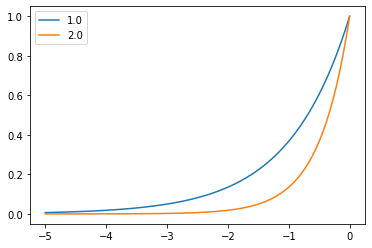

In [70]:
import matplotlib.pyplot as plt

def utility(x, lamb):
    return np.sign(lamb) * np.exp(lamb * x)

x = np.linspace(-5, 0, 500)
plt.plot(x, utility(x, 1.0), label='1.0')
plt.plot(x, utility(x, 2.0), label='2.0')
plt.legend()

In [56]:
x

array([-10.        ,  -9.95991984,  -9.91983968,  -9.87975952,
        -9.83967936,  -9.7995992 ,  -9.75951904,  -9.71943888,
        -9.67935872,  -9.63927856,  -9.5991984 ,  -9.55911824,
        -9.51903808,  -9.47895792,  -9.43887776,  -9.3987976 ,
        -9.35871743,  -9.31863727,  -9.27855711,  -9.23847695,
        -9.19839679,  -9.15831663,  -9.11823647,  -9.07815631,
        -9.03807615,  -8.99799599,  -8.95791583,  -8.91783567,
        -8.87775551,  -8.83767535,  -8.79759519,  -8.75751503,
        -8.71743487,  -8.67735471,  -8.63727455,  -8.59719439,
        -8.55711423,  -8.51703407,  -8.47695391,  -8.43687375,
        -8.39679359,  -8.35671343,  -8.31663327,  -8.27655311,
        -8.23647295,  -8.19639279,  -8.15631263,  -8.11623246,
        -8.0761523 ,  -8.03607214,  -7.99599198,  -7.95591182,
        -7.91583166,  -7.8757515 ,  -7.83567134,  -7.79559118,
        -7.75551102,  -7.71543086,  -7.6753507 ,  -7.63527054,
        -7.59519038,  -7.55511022,  -7.51503006,  -7.47